## 1. Install and Import Dependencies

In [2]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/922.2 kB ? eta -:--:--
   --------------------------------------- 922.2/922.2 kB 14.3 MB/s eta 0:00:00
Using cached setuptools-75.3.0-py3-none-any.whl (1.3 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.6.0
    Uninstalling setuptools-59.6.0:
      Successfully uninstalled setuptools-59.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.2.5 requires httpx>=0.25.0, but you have httpx 0.24.0 which is incompatible.
rasa 3.5.17 requires attrs<22.2,>=19.3, but you have attrs 25.1.0 which is incompatible.
rasa 3.5.17 requires jsonschema<4.18,>=3.2, but you have jsonschema 4.23.0 which is incompatible.
rasa 3.5.17 requires networkx<2.7,>=2.4, but you have networkx 3.1 which is incompatible.
rasa 3.5.17 requires packaging<21.0,>=20.0, but you have packaging 24.2 which is incompatible.
rasa 3.5.17 requires prompt-toolkit<3.0.29,>=3.0, but you have prompt-toolkit 3.0.43 which is incompatible.
rasa 3.5.17 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
rasa 3.5.17 requires pydantic<1.10.3, but you have pydantic 2.10.6 which is incompatible.
rasa 3.5.17 requires python-dateutil<2.9,>=2.8, but you have python-d

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-5 Python-3.8.20 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [8]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'


In [9]:
# results = model(img)
# results.print()
import requests
from PIL import Image
from io import BytesIO

# url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg"
url = "https://static.toiimg.com/photo/106434484/106434484.jpg?v=3"
# Spoof headers to look like a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Fetch image
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    img.show()  # Check if image loads correctly
else:
    print("Failed to download image:", response.status_code)

# Now pass it to YOLO model
results = model(img)
results.print()



C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1600x900 2 persons, 2 baseball bats
Speed: 14.0ms pre-process, 131.0ms inference, 10.5ms NMS per image at shape (1, 3, 640, 384)


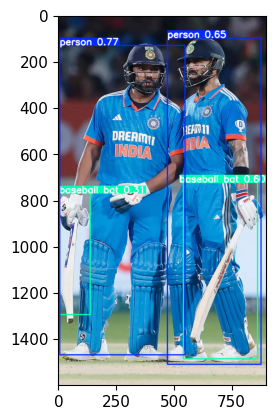

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.xyxy

[tensor([[7.62341e+00, 1.31075e+02, 5.49448e+02, 1.46926e+03, 7.70046e-01, 0.00000e+00],
         [4.73520e+02, 9.99128e+01, 8.78361e+02, 1.51015e+03, 6.53249e-01, 0.00000e+00],
         [5.42350e+02, 7.24697e+02, 8.63538e+02, 1.48661e+03, 5.95707e-01, 3.40000e+01],
         [5.25840e+00, 7.71153e+02, 1.39283e+02, 1.29595e+03, 3.05306e-01, 3.40000e+01]])]

In [12]:
results.render()

[array([[[ 44,  43,  49],
         [ 44,  43,  49],
         [ 45,  44,  50],
         ...,
         [ 29,  33,  45],
         [ 29,  33,  45],
         [ 29,  33,  45]],
 
        [[ 43,  42,  48],
         [ 43,  42,  48],
         [ 42,  41,  47],
         ...,
         [ 19,  23,  35],
         [ 19,  23,  35],
         [ 19,  23,  35]],
 
        [[ 40,  39,  45],
         [ 39,  38,  44],
         [ 38,  37,  43],
         ...,
         [ 17,  21,  33],
         [ 17,  21,  33],
         [ 17,  21,  33]],
 
        ...,
 
        [[219, 212, 193],
         [219, 212, 193],
         [219, 212, 193],
         ...,
         [222, 214, 201],
         [222, 214, 201],
         [222, 214, 201]],
 
        [[219, 212, 193],
         [219, 212, 193],
         [219, 212, 193],
         ...,
         [222, 214, 201],
         [222, 214, 201],
         [222, 214, 201]],
 
        [[219, 212, 193],
         [219, 212, 193],
         [219, 212, 193],
         ...,
         [222, 214, 201],
  

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #press q to exit
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\VINESH/.cache\torch\hub\ultralytics_yolov5_master\m

## 5. Train from scratch

In [14]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images #we will save img data here
labels = ['awake', 'drowsy']
number_imgs = 20 #collect 20 img for each awake n drowsy then label them using a lib

In [16]:
#create a data folder and images folder inside data before running
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5) #sleep for 5 sec
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #create name for img and save the path
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.6724adf4-fa05-11ef-aeca-f0a6548b3038.jpg


In [18]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #uuid gives unquie identification for img so that their name wont overlap
        print(imgname)   

data\images\awake.672733b8-fa05-11ef-8455-f0a6548b3038.jpg
data\images\awake.672733b9-fa05-11ef-b111-f0a6548b3038.jpg
data\images\awake.672733ba-fa05-11ef-817e-f0a6548b3038.jpg
data\images\awake.672733bb-fa05-11ef-ad4b-f0a6548b3038.jpg
data\images\awake.672733bc-fa05-11ef-9d1f-f0a6548b3038.jpg
data\images\awake.672733bd-fa05-11ef-8a50-f0a6548b3038.jpg
data\images\awake.672733be-fa05-11ef-a2c0-f0a6548b3038.jpg
data\images\awake.672733bf-fa05-11ef-b220-f0a6548b3038.jpg
data\images\awake.672733c0-fa05-11ef-bcf2-f0a6548b3038.jpg
data\images\awake.672733c1-fa05-11ef-9e03-f0a6548b3038.jpg
data\images\awake.672733c2-fa05-11ef-b510-f0a6548b3038.jpg
data\images\awake.672733c3-fa05-11ef-a206-f0a6548b3038.jpg
data\images\awake.672733c4-fa05-11ef-9a41-f0a6548b3038.jpg
data\images\awake.672733c5-fa05-11ef-a89f-f0a6548b3038.jpg
data\images\awake.672733c6-fa05-11ef-bf0c-f0a6548b3038.jpg
data\images\awake.672733c7-fa05-11ef-9fff-f0a6548b3038.jpg
data\images\awake.672733c8-fa05-11ef-ab37-f0a6548b3038.j

In [19]:
#labeling
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc
#create labels folder inside data folder

  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata (2.1 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata (552 bytes)
Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl (6.9 MB)
Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
  Attempting uninstall: PyQt5-sip
    Found existing installation: PyQt5-sip 12.13.0
    Uninstalling PyQt5-sip-12.13.0:
      Successfully uninstalled PyQt5-sip-12.13.0
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.10
    Uninstalling PyQt5-5.15.10:
      Successfully uninstalled PyQt5-5.15.10


In [1]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


## 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()